<a href="https://colab.research.google.com/github/tmedeirosb/streamlit-pycaret-ca/blob/main/modelo_pycaret_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo de uso do pycaret para o dataset Câncer


In [1]:
#!pip install pycaret



In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.1'

In [3]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data

data = get_data('cancer')
print("Número de Atributos:", data.shape[1])
print("Preview dos Dados:\n", data.head())

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


Número de Atributos: 10
Preview dos Dados:
    Class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      0    5          1           1          1          2          1       3   
1      0    5          4           4          5          7         10       3   
2      0    3          1           1          1          2          2       3   
3      0    6          8           8          1          3          4       3   
4      0    4          1           1          3          2          1       3   

   breast-quad  irradiat  
0            1         1  
1            2         1  
2            1         1  
3            7         1  
4            1         1  


In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Class', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(683, 10)"
4,Transformed data shape,"(683, 10)"
5,Transformed train set shape,"(478, 10)"
6,Transformed test set shape,"(205, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [5]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9687,0.9967,0.9643,0.9495,0.9557,0.9315,0.9329,0.2510
svm,SVM - Linear Kernel,0.9686,0.9964,0.9522,0.9613,0.9533,0.9299,0.9333,0.0370
knn,K Neighbors Classifier,0.9645,0.9869,0.9463,0.9543,0.9489,0.9217,0.9233,0.1140
lr,Logistic Regression,0.9623,0.9964,0.9342,0.9597,0.9445,0.9161,0.9187,1.1290
ridge,Ridge Classifier,0.9623,0.9962,0.9221,0.9721,0.9443,0.9158,0.9188,0.0360
lda,Linear Discriminant Analysis,0.9623,0.9962,0.9221,0.9721,0.9443,0.9158,0.9188,0.0560
nb,Naive Bayes,0.9603,0.9834,0.9761,0.9209,0.9463,0.9150,0.9176,0.0390
xgboost,Extreme Gradient Boosting,0.9602,0.9948,0.9452,0.9445,0.9427,0.9123,0.9147,0.0670
rf,Random Forest Classifier,0.9581,0.9953,0.9338,0.9498,0.9394,0.9074,0.9103,0.2060
ada,Ada Boost Classifier,0.9581,0.9862,0.9335,0.9485,0.9394,0.9074,0.9092,0.1310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

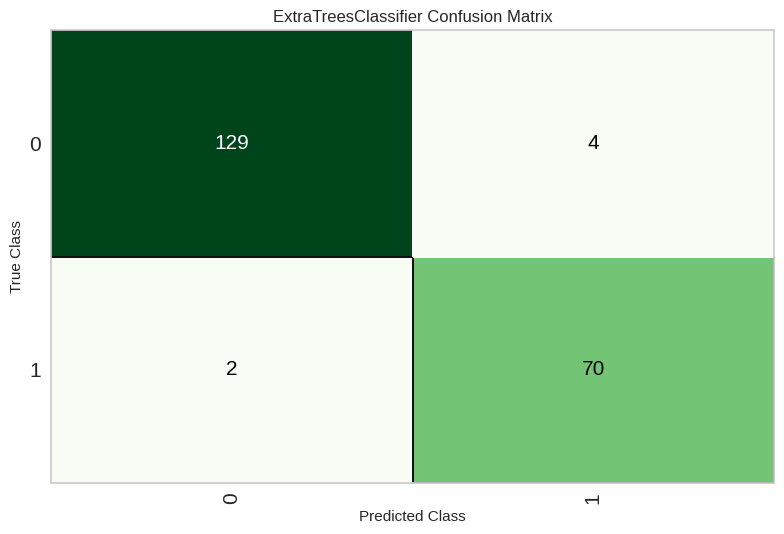

In [6]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

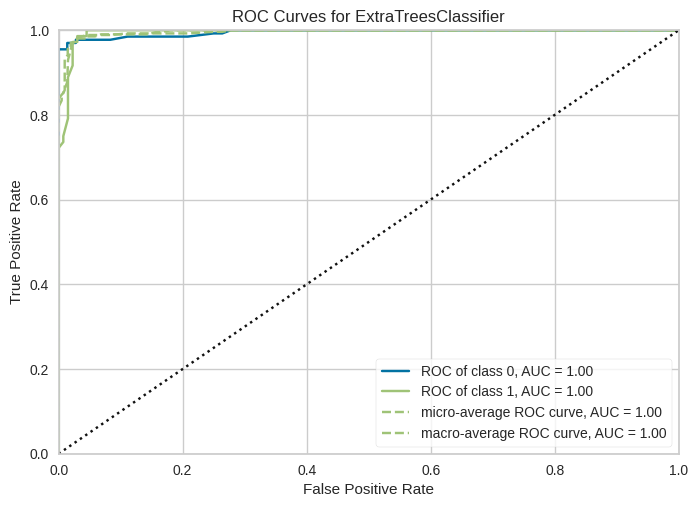

In [7]:
# plot AUC
plot_model(best, plot = 'auc')

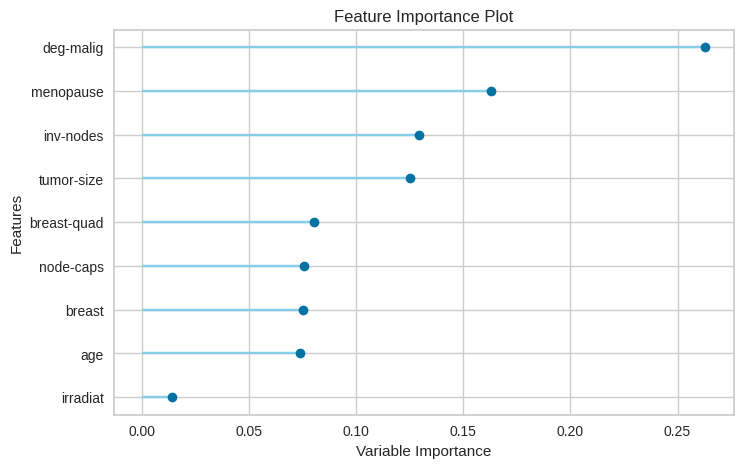

In [8]:
# plot feature importance
plot_model(best, plot = 'feature')

In [9]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9707,0.9951,0.9722,0.9459,0.9589,0.9362,0.9364


In [11]:
# show predictions df
holdout_pred.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,prediction_label,prediction_score
265,7,2,4,1,3,4,3,3,1,1,1,0.61
394,2,3,2,2,2,2,3,1,1,0,0,0.87
337,2,1,1,1,2,1,3,1,1,0,0,1.00
66,8,3,8,3,4,9,8,9,8,1,1,0.93
246,9,10,10,1,10,8,3,3,1,1,1,0.86


In [12]:
# save pipeline
save_model(best, 'cancer_baseline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'menopause', 'tumor-size',
                                              'inv-nodes', 'node-caps',
                                              'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cat...
                  ExtraTreesClassifier(bootstrap=False,

In [13]:
# tune hyperparameters of dt
tuned_dt = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9792,0.9924,1.0000,0.9444,0.9714,0.9551,0.9560
3,0.9792,0.9981,1.0000,0.9444,0.9714,0.9551,0.9560
4,0.9583,0.9905,1.0000,0.8947,0.9444,0.9113,0.9149
5,0.9792,1.0000,0.9412,1.0000,0.9697,0.9538,0.9549
6,0.9583,0.9886,1.0000,0.8947,0.9444,0.9113,0.9149
7,0.9375,0.9980,1.0000,0.8421,0.9143,0.8657,0.8736
8,0.9574,0.9960,0.9375,0.9375,0.9375,0.9052,0.9052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [14]:
tuned_dt

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, monotonic_cst=None,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [15]:
# save pipeline
save_model(tuned_dt, 'cancer_tune')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'menopause', 'tumor-size',
                                              'inv-nodes', 'node-caps',
                                              'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cat...
                  ExtraTreesClassifier(bootstrap=False,

In [16]:
#!pip install pycaret[full]
#!pip install shap

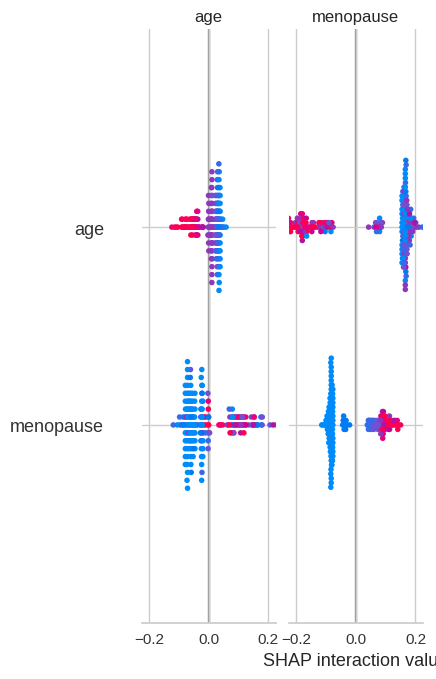

In [17]:
# interpret summary model
interpret_model(tuned_dt, plot = 'summary')

In [23]:
final_best = finalize_model(tuned_dt)

In [24]:
# save model
save_model(final_best, 'final_cancer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'menopause', 'tumor-size',
                                              'inv-nodes', 'node-caps',
                                              'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cat...
                  ExtraTreesClassifier(bootstrap=False,